In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn import metrics as mt
from sklearn.impute import KNNImputer


In [3]:
train=pd.read_csv(r'/Data/Property_train.csv', na_values='missing')
test=pd.read_csv(r'/Data/Property_test_share.csv', na_values='missing')

In [4]:
train.head()

,Junk,InteriorsStyle,PriceIndex8,ListDate,Material,PriceIndex9,Agency,AreaIncomeType,EnvRating,PriceIndex7,...,Region,PriceIndex5,SubModel,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2
0,0,6LLJ,14674.0,9/7/2010,UT7W,8270,CAT3,B,NaN,13143.0,...,A,9022.0,6E9G,GREEN,MD,42077,2008,A,2,10692.0
1,1,XZ9F,4172.0,1/7/2009,PRN0,3890,CAT2,B,NaN,3461.0,...,A,2742.0,FIVQ,SILVER,OK,77258,2002,A,7,3615.0
2,0,QWEV,8210.0,6/23/2010,A9RA,5900,CAT1,B,NaN,6922.0,...,A,3768.0,4K0H,SILVER,SC,94514,2004,A,6,5805.0
3,0,MK2K,7309.0,3/19/2009,RRJQ,7460,OTHER,A,NaN,6300.0,...,A,5370.0,ZLXY,WHITE,NC,82302,2002,C,7,6444.0
4,0,GK4G,9182.0,3/3/2010,HE5A,6400,OTHER,B,NaN,8330.0,...,A,4803.0,FIVQ,SILVER,SC,49176,2007,B,3,6286.0


In [5]:
test.head()

,InteriorsStyle,PriceIndex8,ListDate,Material,PriceIndex9,Agency,AreaIncomeType,EnvRating,PriceIndex7,ExpeditedListing,...,Region,PriceIndex5,SubModel,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2
0,6LLJ,10645.0,9/22/2010,ZCI3,6015,CAT3,A,NaN,9568.0,0,...,B,5911.0,UA42,BLUE,NC,67549,2006,A,4,8311.0
1,QD0H,9891.0,3/12/2010,RRJQ,7625,OTHER,A,NaN,8888.0,0,...,A,5370.0,BUNS,BLUE,FL,56570,2004,B,6,7123.0
2,I7GR,8426.0,10/12/2009,ZCI3,6900,CAT2,B,NaN,7911.0,0,...,A,6862.0,8YTZ,BLACK,OK,51840,2008,A,1,7994.0
3,5KS5,9269.0,5/20/2010,PRN0,6475,CAT1,B,NaN,7773.0,0,...,A,4872.0,FIVQ,GREEN,CO,83300,2005,A,5,5259.0
4,918O,5366.0,1/13/2009,C8A4,3960,CAT1,A,NaN,4134.0,0,...,A,3365.0,KT8F,BLACK,NC,95035,2003,A,6,4362.0


In [6]:
print('Shape of Train data :',train.shape)
print('Shape of Test data :', test.shape)

Shape of Train data : (62035, 31)
Shape of Test data : (10948, 30)


In [7]:
#checking event rate 
#CHeck Target Variable
print('Target Variable : {0}'.format(set(train.columns)-set(test.columns)))
train['Junk'].value_counts(normalize=True)

Target Variable : {'Junk'}


0    0.877456
1    0.122544
Name: Junk, dtype: float64

<AxesSubplot:>

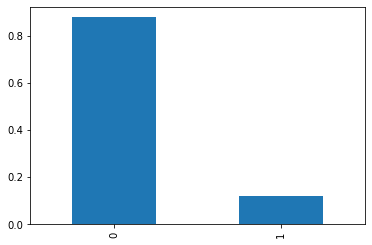

In [8]:
# view the distribution of percentages within the Junk column
(train['Junk'].value_counts()/np.float(len(train))).plot.bar()

In [9]:
#class count
class_count_0, class_count_1 = train['Junk'].value_counts()

# Separate class
class_0 = train[train['Junk'] == 0]
class_1 = train[train['Junk'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (54433, 31)
class 1: (7602, 31)


total class of 1 and 0: 1    54433
0    54433
Name: Junk, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

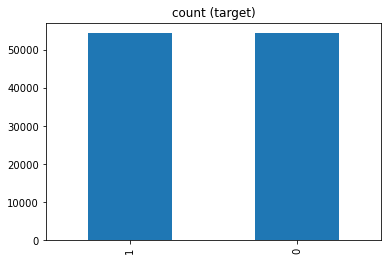

In [10]:
class_1_over = class_1.sample(class_count_0, replace=True)

train = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:", train['Junk'].value_counts())# plot the count after over-sampelingtrain
train['Junk'].value_counts().plot(kind='bar', title='count (target)')


In [11]:
print('Shape of Train data :',train.shape)
print('Shape of Test data :', test.shape)

Shape of Train data : (108866, 31)
Shape of Test data : (10948, 30)


In [12]:
test['Junk']=np.nan
train['data']='train'
test['data']='test'
test= test[train.columns]
all_data= pd.concat([train, test], axis=0)
print(train.shape, test.shape, all_data.shape)

(108866, 32) (10948, 32) (119814, 32)


In [13]:
all_data.head()

,Junk,InteriorsStyle,PriceIndex8,ListDate,Material,PriceIndex9,Agency,AreaIncomeType,EnvRating,PriceIndex7,...,PriceIndex5,SubModel,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2,data
51677,1.0,YBQJ,10934.0,8/18/2010,C8A4,6670,CAT1,B,NaN,9483.0,...,6199.0,KT8F,SILVER,TX,72268,2006,A,4,7881.0,train
58520,1.0,BN7D,4203.0,3/18/2009,NYFD,3600,CAT2,A,NaN,3388.0,...,2674.0,CULD,RED,VA,93157,2003,A,6,3766.0,train
25963,1.0,2XWO,11511.0,6/8/2010,PRN0,6700,CAT2,B,NaN,10705.0,...,6504.0,8YTZ,BLACK,AZ,88598,2007,A,3,7390.0,train
36662,1.0,DUFA,12354.0,12/1/2010,IKAF,7150,CAT2,B,NaN,11119.0,...,7787.0,XHI5,GREY,FL,91554,2008,A,2,8858.0,train
29298,1.0,MTA3,9325.0,4/6/2010,C8A4,6500,CAT1,B,NaN,8712.0,...,5375.0,U3BX,SILVER,AZ,47653,2008,A,2,7086.0,train


In [14]:
#Checking for null values
for col in all_data.columns:
    print(col,":", all_data[col].isnull().sum())

Junk : 10948
InteriorsStyle : 0
PriceIndex8 : 487
ListDate : 0
Material : 0
PriceIndex9 : 0
Agency : 5
AreaIncomeType : 14927
EnvRating : 115696
PriceIndex7 : 487
ExpeditedListing : 0
PriceIndex4 : 28
PriceIndex1 : 28
PriceIndex6 : 487
PRIMEUNIT : 115696
Channel : 0
Zip : 0
InsurancePremiumIndex : 0
PlotType : 0
Architecture : 0
PriceIndex3 : 28
Region : 9
PriceIndex5 : 487
SubModel : 0
Facade : 8
State : 0
NormalisedPopulation : 0
BuildYear : 0
RegionType : 5
PropertyAge : 0
PriceIndex2 : 28
data : 0


####Treating Outliers

In [16]:
all_data['ExpeditedListing'].value_counts()

0    116884
1      2930
Name: ExpeditedListing, dtype: int64

In [17]:
all_data.drop(['NormalisedPopulation','ExpeditedListing'], axis=1, inplace=True)

In [18]:
all_data.corr().style.background_gradient(cmap='summer_r')

,Junk,PriceIndex8,PriceIndex9,PriceIndex7,PriceIndex4,PriceIndex1,PriceIndex6,Zip,InsurancePremiumIndex,PriceIndex3,PriceIndex5,BuildYear,PropertyAge,PriceIndex2
Junk,1.000000,-0.149187,-0.143988,-0.155134,-0.125831,-0.160758,-0.154242,0.012991,0.079996,-0.131712,-0.161938,-0.234671,0.245161,-0.151302
PriceIndex8,-0.149187,1.000000,0.772534,0.990807,0.919139,0.881499,0.926699,0.033195,-0.075452,0.919177,0.918674,0.567140,-0.478993,0.881624
PriceIndex9,-0.143988,0.772534,1.000000,0.772682,0.758664,0.805320,0.796635,0.024110,-0.073979,0.760367,0.801270,0.364201,-0.329694,0.796794
PriceIndex7,-0.155134,0.990807,0.772682,1.000000,0.915967,0.882075,0.915140,0.037126,-0.098880,0.925772,0.920760,0.601157,-0.507934,0.872410
PriceIndex4,-0.125831,0.919139,0.758664,0.915967,1.000000,0.916885,0.869246,0.033255,-0.072101,0.991199,0.862432,0.550196,-0.444858,0.924054
PriceIndex1,-0.160758,0.881499,0.805320,0.882075,0.916885,1.000000,0.942607,0.048967,-0.094452,0.917086,0.948156,0.585388,-0.570535,0.991720
PriceIndex6,-0.154242,0.926699,0.796635,0.915140,0.869246,0.942607,1.000000,0.044129,-0.072254,0.863794,0.991598,0.559013,-0.543439,0.942664
Zip,0.012991,0.033195,0.024110,0.037126,0.033255,0.048967,0.044129,1.000000,-0.035154,0.036223,0.048790,0.064104,-0.073375,0.045075
InsurancePremiumIndex,0.079996,-0.075452,-0.073979,-0.098880,-0.072101,-0.094452,-0.072254,-0.035154,1.000000,-0.095664,-0.097060,-0.313228,0.301690,-0.068265
PriceIndex3,-0.131712,0.919177,0.760367,0.925772,0.991199,0.917086,0.863794,0.036223,-0.095664,1.000000,0.866680,0.585618,-0.473277,0.910775


In [19]:
for col in ['PriceIndex1', 'PriceIndex2', 'PriceIndex3', 'PriceIndex4',
           'PriceIndex5', 'PriceIndex6', 'PriceIndex7', 'PriceIndex8', 'PriceIndex9']:
    all_data[col]=pd.to_numeric(all_data[col], errors='coerce')

In [20]:
all_data['PriceIndex']=all_data[['PriceIndex1', 'PriceIndex2', 'PriceIndex3', 'PriceIndex4',
           'PriceIndex5', 'PriceIndex6', 'PriceIndex7', 'PriceIndex8', 'PriceIndex9']].mean(axis=1)

In [21]:
all_data.drop(['PriceIndex1', 'PriceIndex2', 'PriceIndex3', 'PriceIndex4',
           'PriceIndex5', 'PriceIndex6', 'PriceIndex7', 'PriceIndex8', 'PriceIndex9'], axis=1, inplace=True)

In [22]:
all_data.dtypes

Junk                     float64
InteriorsStyle            object
ListDate                  object
Material                  object
Agency                    object
AreaIncomeType            object
EnvRating                 object
PRIMEUNIT                 object
Channel                   object
Zip                        int64
InsurancePremiumIndex      int64
PlotType                  object
Architecture              object
Region                    object
SubModel                  object
Facade                    object
State                     object
BuildYear                  int64
RegionType                object
PropertyAge                int64
data                      object
PriceIndex               float64
dtype: object

In [23]:
all_data['InteriorsStyle'].value_counts()

K3BB    4702
RCQE    2850
WEGU    2570
V3Y1    2114
2XWO    2107
        ... 
K5O2       1
ALBN       1
7AM2       1
XPKO       1
X722       1
Name: InteriorsStyle, Length: 1063, dtype: int64

In [24]:
all_data['SubModel'].value_counts()

FIVQ    24812
KT8F     6678
UA42     6485
8YTZ     3309
GR5P     1965
        ...  
W0Q3        1
DNP9        1
LWMR        1
991Y        1
VY96        1
Name: SubModel, Length: 864, dtype: int64

In [25]:
##Calculating the frequency of occurence of value, used for high cardinal data
value_cnt = dict(all_data['InteriorsStyle'].value_counts())
for k in value_cnt:
  all_data.loc[all_data['InteriorsStyle']==k,'InteriorsStyle_freq']=value_cnt.get(k)
all_data.drop('InteriorsStyle', axis=1, inplace=True)

In [26]:
value_cnt = dict(all_data['SubModel'].value_counts())
for k in value_cnt:
  all_data.loc[all_data['SubModel']==k,'SubModel_freq']=value_cnt.get(k)
all_data.drop('SubModel', axis=1, inplace=True)

In [27]:
all_data['InteriorsStyle_freq']

51677    1589.0
58520     708.0
25963    2107.0
36662    1551.0
29298     771.0
          ...  
10943     649.0
10944    1137.0
10945     612.0
10946    2107.0
10947     485.0
Name: InteriorsStyle_freq, Length: 119814, dtype: float64

In [28]:
all_data['SubModel_freq'].value_counts()

24812.0    24812
6678.0      6678
6485.0      6485
3309.0      3309
1965.0      1965
           ...  
60.0          60
57.0          57
14.0          56
36.0          36
33.0          33
Name: SubModel_freq, Length: 230, dtype: int64

In [29]:
all_data.head()

,Junk,ListDate,Material,Agency,AreaIncomeType,EnvRating,PRIMEUNIT,Channel,Zip,InsurancePremiumIndex,...,Region,Facade,State,BuildYear,RegionType,PropertyAge,data,PriceIndex,InteriorsStyle_freq,SubModel_freq
51677,1.0,8/18/2010,C8A4,CAT1,B,NaN,NaN,Direct,75236,1038,...,A,SILVER,TX,2006,A,4,train,8409.222222,1589.0,6678.0
58520,1.0,3/18/2009,NYFD,CAT2,A,NaN,NaN,Direct,22801,1065,...,A,RED,VA,2003,A,6,train,3585.888889,708.0,770.0
25963,1.0,6/8/2010,PRN0,CAT2,B,NaN,NaN,Direct,85040,983,...,A,BLACK,AZ,2007,A,3,train,8726.111111,2107.0,3309.0
36662,1.0,12/1/2010,IKAF,CAT2,B,NaN,NaN,Direct,33809,1341,...,A,GREY,FL,2008,A,2,train,9817.666667,1551.0,1782.0
29298,1.0,4/6/2010,C8A4,CAT1,B,NaN,NaN,Other,85284,623,...,A,SILVER,AZ,2008,A,2,train,7714.555556,771.0,71.0


In [30]:
all_data.drop('Zip', axis=1, inplace=True)

In [31]:
all_data.drop('BuildYear', axis=1, inplace=True)

<AxesSubplot:>

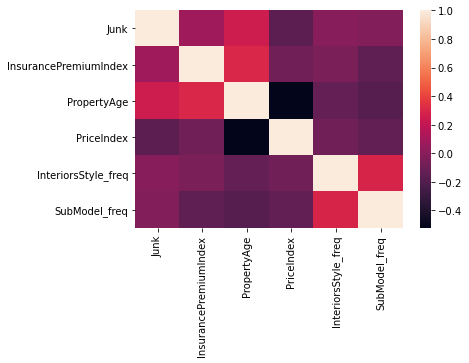

In [32]:
sns.heatmap(all_data.corr())

In [33]:
for i in all_data.columns:
    x= all_data[i].value_counts()
    print('Column name is :',i,'and it  value is :',x)
    print()

Column name is : Junk and it  value is : 0.0    54433
1.0    54433
Name: Junk, dtype: int64

Column name is : ListDate and it  value is : 11/23/2010    691
12/8/2010     686
8/26/2009     644
2/25/2009     635
3/4/2009      607
             ... 
5/25/2009       2
2/20/2010       2
1/10/2010       1
12/24/2010      1
12/4/2010       1
Name: ListDate, Length: 517, dtype: int64

Column name is : Material and it  value is : PRN0    22688
ZCI3    15372
C8A4    14917
NYFD     5720
X7IX     4927
        ...  
JXAI        1
M81Y        1
SD2O        1
MS1W        1
8ZEX        1
Name: Material, Length: 135, dtype: int64

Column name is : Agency and it  value is : CAT1     39437
CAT2     37700
CAT3     22508
OTHER    20164
Name: Agency, dtype: int64

Column name is : AreaIncomeType and it  value is : A    57013
B    46603
C     1271
Name: AreaIncomeType, dtype: int64

Column name is : EnvRating and it  value is : GREEN    3996
RED       122
Name: EnvRating, dtype: int64

Column name is : PRIMEU

In [34]:
all_data['AreaIncomeType'].value_counts()

A    57013
B    46603
C     1271
Name: AreaIncomeType, dtype: int64

In [35]:
all_data['Agency'].value_counts()

CAT1     39437
CAT2     37700
CAT3     22508
OTHER    20164
Name: Agency, dtype: int64

In [36]:
all_data['Region'].value_counts()

A    115775
B      4030
Name: Region, dtype: int64

In [37]:
all_data['RegionType'].value_counts()

A        99645
B        13572
C         6251
OTHER      341
Name: RegionType, dtype: int64

In [38]:
all_data.select_dtypes(['object']).isna().sum()

ListDate               0
Material               0
Agency                 5
AreaIncomeType     14927
EnvRating         115696
PRIMEUNIT         115696
Channel                0
PlotType               0
Architecture           0
Region                 9
Facade                 8
State                  0
RegionType             5
data                   0
dtype: int64

In [39]:
col_to_impute=[]
encoder_dict=dict()
decoder_dict=dict()

col_to_impute=['Agency','AreaIncomeType','Region','RegionType']

#Creating labels for all column values
for col in col_to_impute:
  encoder_dict[col]={key:value for value, key in enumerate(all_data.loc[all_data[col].notnull(), col].unique(), start=1)}

#encoding columns with numerical value
all_data.replace(encoder_dict, inplace=True)

#imputing Missing values
cat_imputer=KNNImputer(n_neighbors=3, weights='distance')
all_data[col_to_impute]=np.round(cat_imputer.fit_transform(all_data[col_to_impute]))

#decoding numerical to categorical
for col in col_to_impute:
  decoder_dict[col]={float(value):key for key ,value in encoder_dict[col].items()}

all_data.replace(decoder_dict, inplace=True)

In [40]:
all_data.head()

,Junk,ListDate,Material,Agency,AreaIncomeType,EnvRating,PRIMEUNIT,Channel,InsurancePremiumIndex,PlotType,Architecture,Region,Facade,State,RegionType,PropertyAge,data,PriceIndex,InteriorsStyle_freq,SubModel_freq
51677,1.0,8/18/2010,C8A4,CAT1,B,NaN,NaN,Direct,1038,WHBI,YIK5,A,SILVER,TX,A,4,train,8409.222222,1589.0,6678.0
58520,1.0,3/18/2009,NYFD,CAT2,A,NaN,NaN,Direct,1065,DIJX,TP7R,A,RED,VA,A,6,train,3585.888889,708.0,770.0
25963,1.0,6/8/2010,PRN0,CAT2,B,NaN,NaN,Direct,983,WHBI,TP7R,A,BLACK,AZ,A,3,train,8726.111111,2107.0,3309.0
36662,1.0,12/1/2010,IKAF,CAT2,B,NaN,NaN,Direct,1341,WHBI,AVYP,A,GREY,FL,A,2,train,9817.666667,1551.0,1782.0
29298,1.0,4/6/2010,C8A4,CAT1,B,NaN,NaN,Other,623,DIJX,YIK5,A,SILVER,AZ,A,2,train,7714.555556,771.0,71.0


In [41]:
all_data.select_dtypes(['object']).isna().sum()

ListDate               0
Material               0
Agency                 0
AreaIncomeType         0
EnvRating         115696
PRIMEUNIT         115696
Channel                0
PlotType               0
Architecture           0
Region                 0
Facade                 8
State                  0
RegionType             0
data                   0
dtype: int64

In [42]:
all_data['AreaIncomeType'].value_counts()

B    59474
A    59069
C     1271
Name: AreaIncomeType, dtype: int64

In [43]:
all_data['EnvRating'].value_counts()

GREEN    3996
RED       122
Name: EnvRating, dtype: int64

In [44]:
all_data['AreaIncomeType'].value_counts()

B    59474
A    59069
C     1271
Name: AreaIncomeType, dtype: int64

In [45]:
all_data['RegionType'].value_counts()

A        99650
B        13572
C         6251
OTHER      341
Name: RegionType, dtype: int64

In [46]:
all_data['PRIMEUNIT'].value_counts()

NO     4034
YES      84
Name: PRIMEUNIT, dtype: int64

In [47]:
all_data['Region'].value_counts()

A    115784
B      4030
Name: Region, dtype: int64

In [48]:
all_data['Channel'].value_counts()

Direct    65421
Other     28428
Agent     25965
Name: Channel, dtype: int64

In [49]:
all_data['Agency'].value_counts()

CAT1     39437
CAT2     37705
CAT3     22508
OTHER    20164
Name: Agency, dtype: int64

In [50]:
all_data['PRIMEUNIT_NO'] = np.where(all_data['PRIMEUNIT'] == 'NO',1,0)
all_data['EnvRating_green'] = np.where(all_data['EnvRating'] == 'GREEN',1,0)
all_data['Channel_Agent'] = np.where(all_data['Channel'] == 'Agent',1,0)
all_data['AreaIncomeType_B'] = np.where(all_data['AreaIncomeType']=='B' , 1, 0)
all_data['Region_A'] = np.where(all_data['Region']=='A' , 1, 0)
all_data['RegionType_A'] = np.where(all_data['RegionType']=='A', 1, 0)

In [51]:
all_data.drop(['PRIMEUNIT', 'EnvRating', 'Channel', 'AreaIncomeType', 'Region', 'RegionType' ], axis=1, inplace=True)

In [51]:
all_data['EnvRating_green'].value_counts()

0    115791
1      4023
Name: EnvRating_green, dtype: int64

In [40]:
all_data.groupby("PlotType")["Junk"].mean()

PlotType
32T2    0.551676
7RBQ    0.421887
8FRL    0.547253
DIJX    0.570774
DJOP    0.550812
DSSM    0.488784
I00H    0.468940
LIGY    0.620641
T559    0.000000
V5R0    0.583300
W62B    0.413261
WHBI    0.478612
WLQ6    0.517499
Name: Junk, dtype: float64

In [41]:
all_data.head()

,Junk,ListDate,Material,Agency,InsurancePremiumIndex,PlotType,Architecture,Facade,State,PropertyAge,data,PriceIndex,InteriorsStyle_freq,SubModel_freq,PRIMEUNIT_NO,EnvRating_green,Channel_Agent,AreaIncomeType_B,Region_A,RegionType_A
9063,1.0,11/4/2009,RRJQ,OTHER,1508,32T2,4GZ4,SILVER,CA,4,train,7669.000000,293.0,649.0,0,0,0,0,1,0
51884,1.0,2/2/2010,PRN0,CAT1,2508,WHBI,YIK5,GOLD,TX,8,train,3992.444444,920.0,24847.0,0,0,1,1,1,1
14687,1.0,12/1/2010,DJOP,CAT3,1197,V5R0,I3Z9,BLUE,VA,5,train,13474.555556,541.0,218.0,0,0,1,0,1,1
21441,1.0,9/25/2009,GG8E,CAT2,1673,WHBI,AVYP,SILVER,CA,7,train,3416.333333,49.0,44.0,0,0,1,0,1,1
9842,1.0,2/25/2010,H5XT,OTHER,671,WHBI,8SPA,BLUE,CO,4,train,9179.000000,378.0,798.0,0,0,0,0,1,0


In [42]:
all_data.dtypes

Junk                     float64
ListDate                  object
Material                  object
Agency                    object
InsurancePremiumIndex      int64
PlotType                  object
Architecture              object
Facade                    object
State                     object
PropertyAge                int64
data                      object
PriceIndex               float64
InteriorsStyle_freq      float64
SubModel_freq            float64
PRIMEUNIT_NO               int32
EnvRating_green            int32
Channel_Agent              int32
AreaIncomeType_B           int32
Region_A                   int32
RegionType_A               int32
dtype: object

In [43]:
all_data.groupby("State")["Junk"].mean().reset_index()

,State,Junk
0,AL,0.494118
1,AR,0.666667
2,AZ,0.474176
3,CA,0.529800
4,CO,0.494421
5,FL,0.474448
6,GA,0.469282
7,IA,0.549628
8,ID,0.433198
9,IL,0.533333


In [44]:
all_data['State_1'] = np.where(all_data.isin(['AL','AZ','CA','CO','FL','GA','MD','NC','NJ','NM','TN','UT'])['State'], 1, 0)
all_data['State_2'] = np.where(all_data.isin(['IA','IL','IN','LA','NV','SC','TX','VA'])['State'], 1 , 0)
all_data['State_3'] = np.where(all_data.isin(['ID','MA','MI','MO','MS','OH','OK','WV'])['State'], 1 , 0)
all_data['State_4'] = np.where(all_data.isin(['KY','MN','NE','NH','NY','OR','WA'])['State'], 1 , 0)
all_data['State_5'] = np.where(all_data.isin(['AR','PA'])['State'], 1 , 0)

In [52]:
all_data.drop(['State'] , axis=1, inplace=True)

In [53]:
all_data.groupby("Agency")["Junk"].mean().reset_index()

,Agency,Junk
0,CAT1,0.460805
1,CAT2,0.486332
2,CAT3,0.572162
3,OTHER,0.520400


In [54]:
all_data['Agency_CAT_1_2']   = np.where(np.logical_or(all_data['Agency']=='CAT1', all_data['Agency']=='CAT2') , 1, 0)
all_data['Agency_CAT_3']     = np.where(all_data['Agency']=='CAT3', 1, 0)

In [55]:
all_data.drop(['Agency'] , axis=1, inplace=True)

In [56]:
#all_data.groupby("PlotType")["Junk"].mean().reset_index()

In [57]:
all_data['PlotType_1'] = np.where(all_data.isin(['32T2','8FRL','DIJX','DJOP','LIGY','V5R0','WLQ6'])['PlotType'], 1, 0)
all_data['PlotType_2'] = np.where(all_data.isin(['WHBI','W62B','T559','I00H','DSSM','7RBQ'])['PlotType'], 1 , 0)

In [58]:
#all_data.groupby("Architecture")["Junk"].mean().reset_index()

In [59]:
all_data['Architecture_1'] = np.where(all_data.isin(['XDZM', 'W86R', 'BOLF', 'OYQM', 'PQP2',
                                                     'AZHP', 'O8PU', 'STJH','GHDG','CR4E'])['Architecture'], 1, 0)
all_data['Architecture_2'] = np.where(all_data.isin(['X120','RZOR','RIAX','KML6','K92H','I3Z9','FCXM','AVYP', '8SPA', '7IYX'])['Architecture'], 1 , 0)
all_data['Architecture_3'] = np.where(all_data.isin(['WWBR','YIK5','TP7R','M3C0','DKOO','5NBT','5A9R', '4GZ4', '1M5X', '1IKD'])['Architecture'], 1 , 0)
all_data['Architecture_4'] = np.where(all_data.isin(['R0QP','OJBM', '2MTV'])['Architecture'], 1 , 0)

In [60]:
all_data.drop(['Architecture', 'PlotType', 'Facade', 'Material', 'ListDate'] , axis=1, inplace=True)

In [61]:
all_data.dtypes

Junk                     float64
InsurancePremiumIndex      int64
PropertyAge                int64
data                      object
PriceIndex               float64
InteriorsStyle_freq      float64
SubModel_freq            float64
PRIMEUNIT_NO               int32
EnvRating_green            int32
Channel_Agent              int32
AreaIncomeType_B           int32
Region_A                   int32
RegionType_A               int32
Agency_CAT_1_2             int32
Agency_CAT_3               int32
PlotType_1                 int32
PlotType_2                 int32
Architecture_1             int32
Architecture_2             int32
Architecture_3             int32
Architecture_4             int32
dtype: object

In [62]:
all_data.isnull().sum()

Junk                     10948
InsurancePremiumIndex        0
PropertyAge                  0
data                         0
PriceIndex                   0
InteriorsStyle_freq          0
SubModel_freq                0
PRIMEUNIT_NO                 0
EnvRating_green              0
Channel_Agent                0
AreaIncomeType_B             0
Region_A                     0
RegionType_A                 0
Agency_CAT_1_2               0
Agency_CAT_3                 0
PlotType_1                   0
PlotType_2                   0
Architecture_1               0
Architecture_2               0
Architecture_3               0
Architecture_4               0
dtype: int64

In [63]:
all_data.select_dtypes('object').columns

Index(['data'], dtype='object')

In [64]:
train_data = all_data[all_data['data'] == 'train']
test_data = all_data[all_data['data'] == 'test']

In [65]:
del all_data
del train_data['data']
del test_data['data']
del test_data['Junk']

In [66]:
train_feature=train_data.drop(['Junk'], axis=1)
train_feature.head()

,InsurancePremiumIndex,PropertyAge,PriceIndex,InteriorsStyle_freq,SubModel_freq,PRIMEUNIT_NO,EnvRating_green,Channel_Agent,AreaIncomeType_B,Region_A,RegionType_A,Agency_CAT_1_2,Agency_CAT_3,PlotType_1,PlotType_2,Architecture_1,Architecture_2,Architecture_3,Architecture_4
51677,1038,4,8409.222222,1589.0,6678.0,0,0,0,1,1,1,1,0,0,1,0,0,1,0
58520,1065,6,3585.888889,708.0,770.0,0,0,0,0,1,1,1,0,1,0,0,0,1,0
25963,983,3,8726.111111,2107.0,3309.0,0,0,0,1,1,1,1,0,0,1,0,0,1,0
36662,1341,2,9817.666667,1551.0,1782.0,0,0,0,1,1,1,1,0,0,1,0,1,0,0
29298,623,2,7714.555556,771.0,71.0,0,0,0,1,1,1,1,0,1,0,0,0,1,0


In [67]:
train_target=train_data['Junk']
train_target.head()

51677    1.0
58520    1.0
25963    1.0
36662    1.0
29298    1.0
Name: Junk, dtype: float64

In [68]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve

In [69]:
X_train, X_test,y_train, y_test= train_test_split(train_feature,train_target,test_size=0.3,
                                                  random_state=0)

In [73]:
print(X_train.shape,  X_test.shape,  y_train.shape,  y_test.shape)

(76206, 19) (32660, 19) (76206,) (32660,)


In [71]:
# I keep a copy of the dataset with all the variables
# to measure the performance of machine learning models
# at the end of the notebook

X_train_original = X_train.copy()
X_test_original = X_test.copy()

Remove constant features¶

In [72]:
# remove constant features
constant_features = [
    feat for feat in X_train.columns if X_train[feat].std() == 0
]

X_train.drop(labels=constant_features, axis=1, inplace=True)
X_test.drop(labels=constant_features, axis=1, inplace=True)

X_train.shape, X_test.shape

C:\Anaconda folder\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


((76206, 19), (32660, 19))

In [74]:
from sklearn.feature_selection import VarianceThreshold
# remove quasi-constant features
sel = VarianceThreshold(
    threshold=0.01)  # 0.1 indicates 99% of observations approximately

sel.fit(X_train)  # fit finds the features with low variance

sum(sel.get_support()) # how many not quasi-constant?

18

In [75]:
features_to_keep = X_train.columns[sel.get_support()]

In [76]:
# we can then remove the features like this
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((76206, 18), (32660, 18))

In [77]:
# sklearn transformations lead to numpy arrays
# here I transform the arrays back to dataframes
# please be mindful of getting the columns assigned
# correctly
X_train= pd.DataFrame(X_train)
X_train.columns = features_to_keep

X_test= pd.DataFrame(X_test)
X_test.columns = features_to_keep

Remove duplicated features

In [78]:
# check for duplicated features in the training set
duplicated_feat = []
for i in range(0, len(X_train.columns)):
    if i % 10 == 0:  # this helps me understand how the loop is going
        print(i)

    col_1 = X_train.columns[i]

    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
            
len(duplicated_feat)

0
10


0

In [79]:

# I keep a copy of the dataset except constant and duplicated variables
# to measure the performance of machine learning models
# at the end of the notebook

X_train_basic_filter = X_train.copy()
X_test_basic_filter = X_test.copy()

Remove correlated features

In [80]:

# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  3


In [81]:

X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((76206, 15), (32660, 15))

In [82]:
X_train.columns

Index(['InsurancePremiumIndex', 'PropertyAge', 'PriceIndex',
       'InteriorsStyle_freq', 'SubModel_freq', 'PRIMEUNIT_NO', 'Channel_Agent',
       'AreaIncomeType_B', 'Region_A', 'RegionType_A', 'Agency_CAT_1_2',
       'Agency_CAT_3', 'PlotType_1', 'Architecture_1', 'Architecture_2'],
      dtype='object')

In [75]:
# create a function to build random forests and compare performance in train and test set

def run_randomForests(Xtrain, Xtest, ytrain, ytest):
    X_train, X_test = Xtrain.copy(), Xtest.copy()
    y_train, y_test = ytrain.copy(), ytest.copy()
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [76]:

# original
run_randomForests(X_train_original,
                  X_test_original,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.6805276088148167
Test set
Random Forests roc-auc: 0.6793071693130597


In [79]:
# create a function to build logistic regression and compare performance in train and test set

def run_logistic(X_train, X_test, y_train, y_test):
    # function to train and test the performance of logistic regression
    logit = LogisticRegression(random_state=44)
    logit.fit(X_train, y_train)
    print('Train set')
    pred = logit.predict_proba(X_train)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = logit.predict_proba(X_test)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [80]:
from sklearn.preprocessing import StandardScaler
# original
# for logistic regression features need to be in the same scale

# original
scaler = StandardScaler().fit(X_train_original)

run_logistic(scaler.transform(X_train_original),
             scaler.transform(X_test_original),
                  y_train, y_test)

Train set
Logistic Regression roc-auc: 0.6712979077075438
Test set
Logistic Regression roc-auc: 0.6730478259520363


In [83]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

def run_xgboost(Xtrain, Xtest, ytrain, ytest):
    X_train, X_test = Xtrain.copy(), Xtest.copy()
    y_train, y_test = ytrain.copy(), ytest.copy()
    model = xgb.XGBClassifier( n_estimators=500, min_child_weight=2, 
                                   gamma=5, max_depth=6, subsample=0.8, colsample_bylevel=0.8,
                               colsample_bytree=0.8)
    param_dist = {"max_delta_step": [0,1,3,6,10],
                "scale_pos_weight": [1,2,3,4],}
    grid_search = GridSearchCV(model, param_grid=param_dist,cv=5, scoring='roc_auc', verbose=False, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print('Train set')
    x_pred = grid_search.predict(X_train)
    x_pred_prob = grid_search.predict_proba(X_train)
    print('Train Data Score : {0:.3f}'.format(grid_search.score(X_train, y_train)))
    print('Accuracy : {0:.3f}'.format(mt.accuracy_score(y_train, x_pred)))
    print('Recall : {0:.3f}'.format(mt.recall_score(y_train, x_pred)))
    print('AUC : {0:.3f}'.format(mt.roc_auc_score(y_train, x_pred_prob[:,1]) ))
    print('Precission : {0:.3f}'.format(mt.precision_score(y_train, x_pred)))
    print('F-Beta Score : {0:.3f}'.format(mt.fbeta_score(y_train, x_pred, beta=2)))

    print('Test set')
    y_pred =grid_search.predict(X_test)
    y_pred_prob = grid_search.predict_proba(X_test)
    print('Test Data Score : {0:.3f}'.format(grid_search.score(X_test, y_test)))
    print('Accuracy : {0:.3f}'.format(mt.accuracy_score(y_test, y_pred)))
    print('Recall : {0:.3f}'.format(mt.recall_score(y_test, y_pred)))
    print('AUC : {0:.3f}'.format(mt.roc_auc_sore(y_test, y_pred_prob[:,1]) ))
    print('Precission : {0:.3f}'.format(mt.precision_score(y_test, y_pred)))
    print('F-Beta Score : {0:.3f}'.format(mt.fbeta_score(y_test, y_pred, beta=2)))
     

In [84]:

# original
run_xgboost(X_train_original,
                  X_test_original,
                  y_train, y_test)

C:\Anaconda folder\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:35:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train set
Train Data Score : 0.963
Accuracy : 0.804
Recall : 0.998
AUC : 0.963
Precission : 0.720
F-Beta Score : 0.926
Test set
Test Data Score : 0.917
Accuracy : 0.757
Recall : 0.993
AUC : 0.917
Precission : 0.674
F-Beta Score : 0.907
